In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [4]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [5]:
survey  = 'gama'
version = 'GAMA4'
dryrun  = False

In [6]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
388240,587727944566112503,139.23047512,2.42943373,19.356083,0.11227,4,G09_Y2_031_011,6,20.3459,19.531559,19.267254,19.008936,19.195526,0.11227,366.2462822650856,37.81886612449065,G9,0,0,-249.1522446068873,214.83129405937459,13.957745738742293,247.66335024615293,-216.5633713813023,13.686332116336128,0.2643051,19.356083,0.2505800799748563,0,2,-0.10631518303449063,-0.09259014826325322,0.05906841965002933,0.06290116070533854,0.2604723736907846,2.12,-0.1089019,-0.23801239,-18.412949724847653,-18.28383923953233,-18.52185162788091,37.76903264110742,37.87793454414068,37.6399221557921,-0.09450373785197601,-0.0767495456537865,0.1222211405102251,0.18842574405987678,-18.47610244570785,0.44391632,0.13951500174464584,0.0,-7.356083,0.0037928473538818243,0.0,1231418.7357025847
325157,587726032767418968,138.86944953,1.81225715,19.22173,0.2254,4,G09_Y4_253_067,6,21.704472,19.943916,19.146784,18.666384,18.506607,0.2254,791.1401439652432,39.49126711002759,G9,0,0,-486.04440615291793,424.4601576273573,20.417394891190096,483.094981170063,-427.83895108584494,19.887968266947663,0.7971325,19.22173,0.5536451840253688,0,4,-0.051193456398652505,0.1922938516414084,0.15716116256354462,0.44041841684410465,0.5138752377848697,2.12,-0.218638,-0.47784796,-20.208060991154216,-19.948851030455135,-20.426698994026683,39.42979026971867,39.64842827259114,39.17058030901959,-0.03242985298085599,0.21572255629950643,0.18429502538134512,0.4808978460131697,-20.23519485397202,0.57826996,0.29855389056840537,0.0,-7.2217293,0.008147926970053452,0.0,10893633.15187567
130171,587724649792274653,176.25074554,-2.1572505,17.006708,0.1255,5,369446390578833408,6,19.706766,17.904467,16.867277,16.402933,16.02349,0.1255,413.1612741247055,38.08059804025287,G12,0,0,-366.0460595877974,23.987142799511304,-13.818135719321639,365.85453873179625,-26.53894211237555,-14.21909543873022,1.0371895,17.006708,0.9690249394884838,0,6,-0.06865799266503592,-0.0004934485109417269,0.16170473504341298,0.39183459710047575,0.8070596215855154,0.8,-0.121735,-0.10039999,-21.113859631034448,-21.13519463679464,-21.235594630154683,38.12056777617605,38.24230277529629,38.141902781936246,-0.08561658163724116,-0.04654413412548925,0.13110829672495994,0.21863115558817403,-21.083263192715997,2.793291,0.3620512359437112,0.0,-5.006708,0.013943739829106828,0.0,18612410.458319094
545665,588848898856649042,220.52254643,-0.86410375,19.095922,0.15249,4,G15_Y2_002_265,6,21.510332,20.07794,19.05904,18.66895,18.377905,0.15249,511.2061887987847,38.54298051433635,G15,0,0,-337.13903023593866,-288.1734533157581,-6.689377784967644,339.13268826952515,285.81562943438297,-7.061047912403237,1.0188999,19.095922,0.8846505800270014,0,6,-0.03860408222639963,0.09564525534913815,0.18873666721031376,0.4644778707432804,0.7431587140695725,0.8,-0.1479153,-0.12199201,-19.487879407746767,-1

In [7]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

DEC,MCOLOR_0P0,ZMIN,ZMAX,MALL_0P0,FIELD,FILLFACTOR_VMAX,FILLFACTOR,RA,IN_D8LUMFN,WEIGHT_STEPWISE,ZSURV,VMAX,VZ
deg,mag,,,mag,,,,deg,,,,,
float64,float64,float64,float64,float64,bytes3,float64,float64,float64,int64,float64,float32,float64,float64
2.42943373,-18.28383923953233,0.036729998886585236,0.13951500174464584,-18.412949724847653,G9,0.624288538250441,0.8127160046085126,139.23047512,0,2.5324446308643034,0.11227,753859.1474602104,628625.4377848413
1.81225715,-19.948851030455135,0.036729998886585236,0.2706100046634674,-20.208060991154216,G9,0.7797192364390116,1.0,138.86944953,0,6.771929604808127,0.2254,6424956.386552604,4894603.446660215
-2.1572505,-21.13519463679464,0.036729998886585236,0.2706100046634674,-21.113859631034448,G12,0.7797192364390116,0.9235727057534775,176.25074554,0,2.7879565542227054,0.1255,6424956.386552604,880228.4288816366
-0.86410375,-19.513802704555964,0.036729998886585236,0.20225379188420323,-19.487879407746767,G15,0.7287106967347928,1.0,220.52254643,0,3.8510701868189137,0.15249,2610878.7742084656,1571184.8076225782
-0.95353519,-20.75306876756291,0.036729998886585236,0.2706100046634674,-20.735181361511753,G12,0.7797192364390116,1.0,177.58136829,0,2.310720721840845,0.10522,6424956.386552604,515559.4551880245
0.96169929,-18.095932068056264,0.036729998886585236,0.12298310172853909,-18.194280052310624,G15,0.5851567325943148,1.0,216.57421687,0,1.923196749417998,0.08552,484643.0275549797,269199.9442781308
-0.49210816,-19.215623414672855,0.036729998886585236,0.21694002031558093,-19.39528787747765,G9,0.7458250316399908,1.0,136.61920934,0,3.8510701868189137,0.15623,3270659.631652062,1687458.8111005237
-1.7624878,-20.73918807667125,0.036729998886585236,0.2706100046634674,-20.69536718886722,G15,0.7797192364390116,0.834164619761692,221.42715873,0,10.03096547575655,0.25777,6424956.386552604,7179212.017488108


Text(0.5, 0, 'ZMAX')

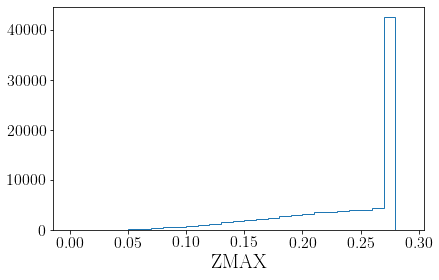

In [8]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [9]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03673   , 0.03933423, 0.03966329, 0.09538587])

Text(0, 0.5, '$z_{\\rm max}$')

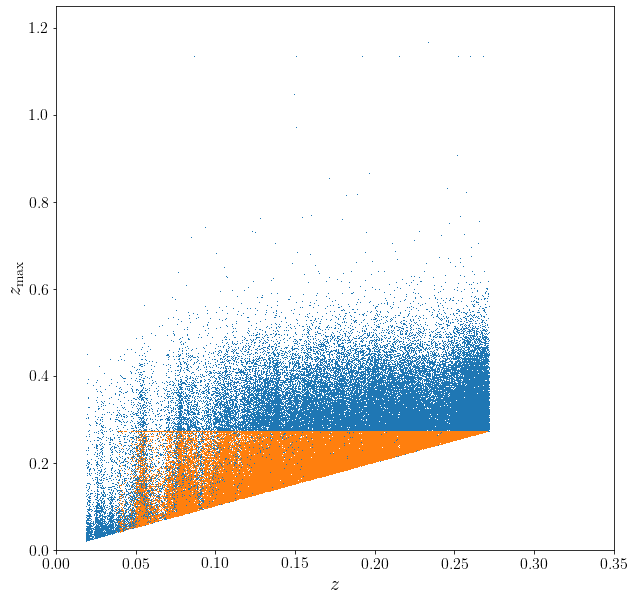

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 1.25)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

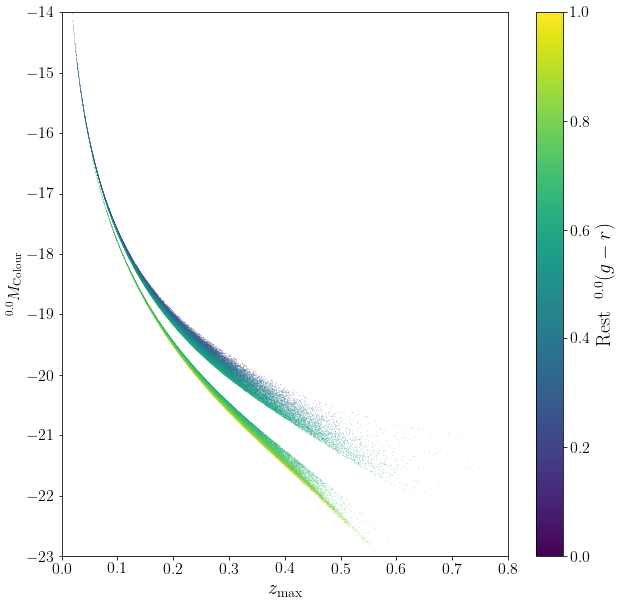

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.0,   0.8)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

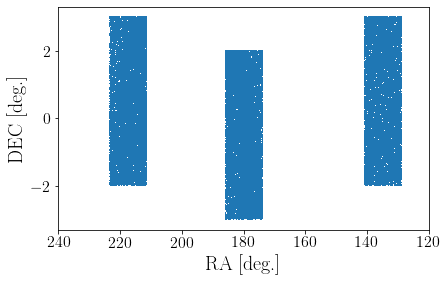

In [12]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [13]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,MEAN_M,MID_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64
-25.4,-25.4,-25.4,0.0,0.0,0.0,0.0,0.0,0.0
-25.48584913809907,-25.48584913809907,-25.200000000000003,6.067895169459533e-07,6.067895169459533e-07,8.158791962347847e-07,8.158791962347847e-07,1.0,0.7437247079546051
-25.0,-25.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0
-24.800000000000004,-24.800000000000004,-24.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0
-24.6,-24.6,-24.6,0.0,0.0,0.0,0.0,0.0,0.0
-24.400000000000006,-24.400000000000006,-24.400000000000006,0.0,0.0,0.0,0.0,0.0,0.0
-24.200000000000003,-24.200000000000003,-24.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-24.000000000000007,-24.000000000000007,-24.000000000000007,0.0,0.0,0.0,0.0,0.0,0.0
-23.800000000000004,-23.800000000000004,-23.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, '$V/V_{Max}$')

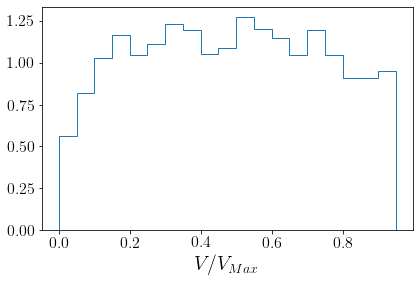

In [14]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

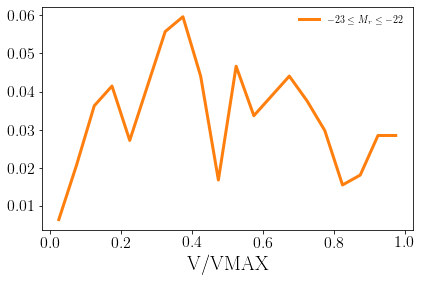

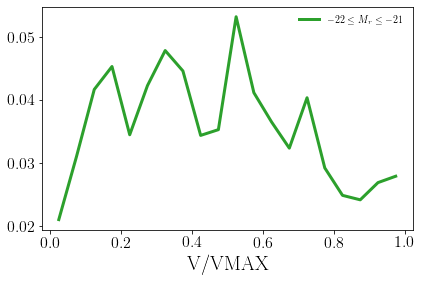

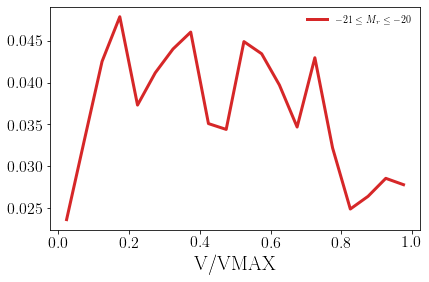

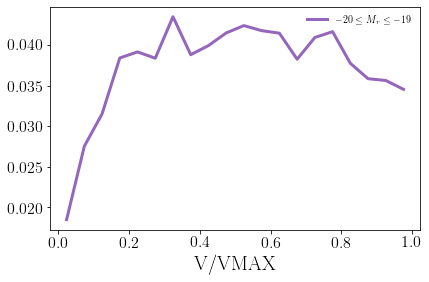

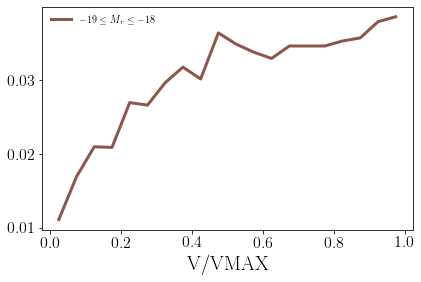

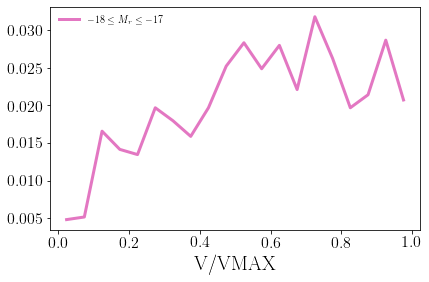

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [16]:
spurious = gama_zmax[gama_zmax['REST_GMR_0P1_WARN'] > 0.0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
84548,587722983886881328,178.41186365,0.53094523,19.129574,0.14889,4,G12_Y2_042_085,6,28.227417,29.744629,18.847836,29.051346,23.953873,0.14889,497.94976691080626,38.48592766707365,G12,0,0,-433.23304428929094,12.01152005870378,4.016316713129331,433.142899165352,-15.032094939512701,3.5416242870717847,10.896793,19.129574,-99.0,2,1,-0.13889772296610337,-0.0765818069362224,0.022382996340270717,0.051262804552402355,10.867913557266384,0.8,-0.1444233,-0.11911201,-19.234313535404127,-19.25962483407251,-19.37873684139244,38.36388735742561,38.50831066341392,38.389198656093996,-0.07153357457968779,0.01002668527675725,0.14519130378251333,0.27520197499042054,-19.35712184284637,0.6704254,0.2045565206929093,0.0,-7.129574,0.0059108656363813005,0.0,3725782.2344622263


Text(0.5, 0, 'ZSURV')

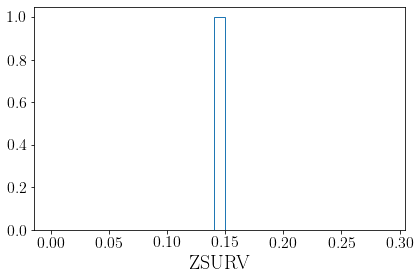

In [17]:
_ = pl.hist(spurious['ZSURV'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZSURV')

Text(0.5, 0, 'GMR')

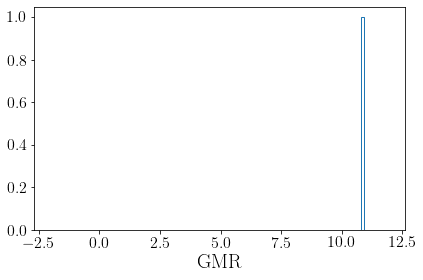

In [18]:
_ = pl.hist(spurious['GMR'], bins=np.arange(-2., 12., 0.1), histtype='step')
pl.xlabel('GMR')

Text(0.5, 0, 'MCOLOR_0P0')

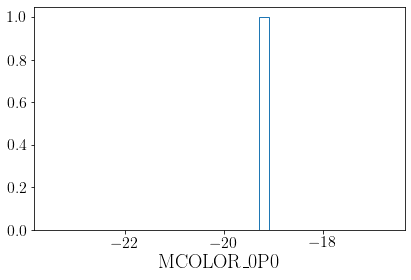

In [19]:
_ = pl.hist(spurious['MCOLOR_0P0'], bins=np.arange(-23.5, -16.5, 0.2), histtype='step')
pl.xlabel('MCOLOR_0P0')

In [20]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,2.0,-5.586954,0.014802823191502936,0.0,--
3575961,587729150374183054,129.57201259,-1.52684958,18.192387,0.26979,4,G09_Y4_203_202,4,18.796778,18.521933,18.19031,18.019787,17.934858,0.26979,971.821741779177,39.9379330547684,G9,0,0,-487.38521327287486,589.7338070693977,-20.392804191308386,483.2386028873673,-593.1179318699727,-20.922412722928343,0.33162308,18.192387,0.06106759233484382,0,1,-0.24046554782359378,0.030089937234125563,-0.0791848285172197,0.1579345487227503,0.09450370015260812,2.12,-0.2616963,-0.5719547,-21.404665290202672,-21.094406871881063,-21.666361599053914,39.59705191739994,39.85874822625118,39.28679349907833,-0.008268597424145471,0.34202323421941305,0.20845628093805563,0.6071985239330764,-21.692306399657948,1.6076126,-99.0,2.0,-6.1923866,0.013743350935792003,0.0,--


In [21]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.